In [7]:
import pandas as pd
df = pd.read_excel("data/SampleSuperstore.xlsx")
# Load first 5 rows
df.head()

C:\Users\AnthonyM\AppData\Local\anaconda3\envs\Jennifer\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [10]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [11]:
#convert Order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# preview
df['Order Date'].head()

0   2018-11-08
1   2018-11-08
2   2018-06-12
3   2017-10-11
4   2017-10-11
Name: Order Date, dtype: datetime64[ns]

Matplotlib is building the font cache; this may take a moment.


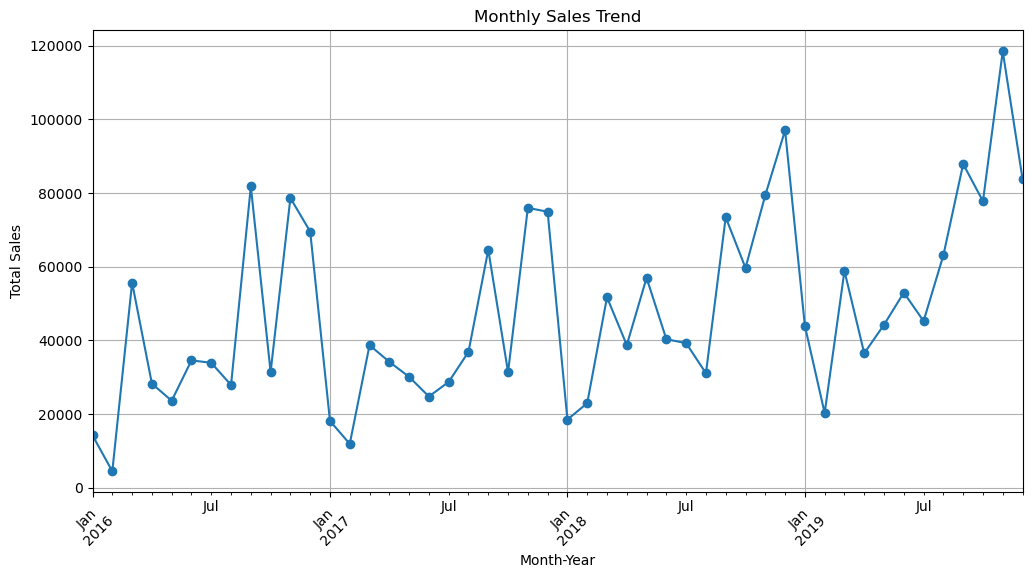

In [12]:
import matplotlib.pyplot as plt

# Create a new column for Month-Year
df['Month-Year'] = df['Order Date'].dt.to_period('M')

# Aggregate sales by Month-Year
monthly_sales = df.groupby('Month-Year')['Sales'].sum()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

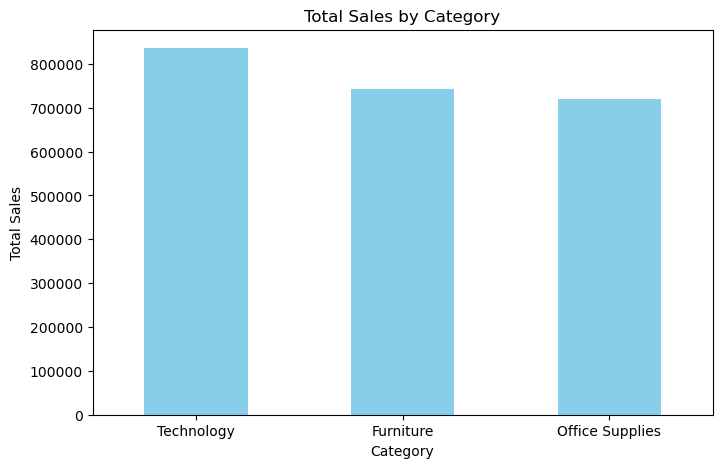

In [13]:
# Aggregate sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


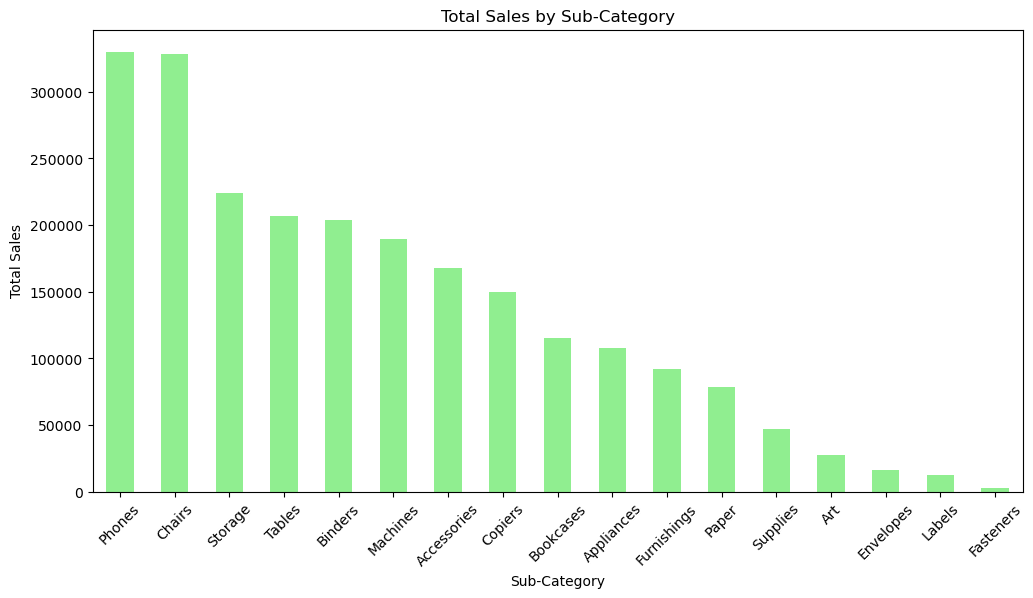

In [14]:
# Aggregate by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
subcat_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


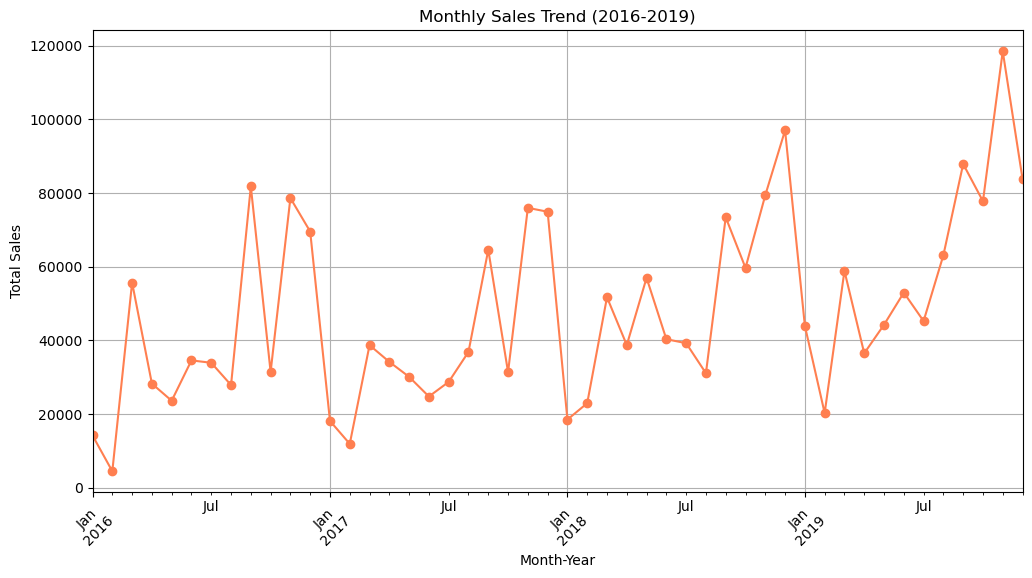

In [15]:
# Already created Month-Year column
monthly_sales = df.groupby('Month-Year')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='coral')
plt.title('Monthly Sales Trend (2016-2019)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


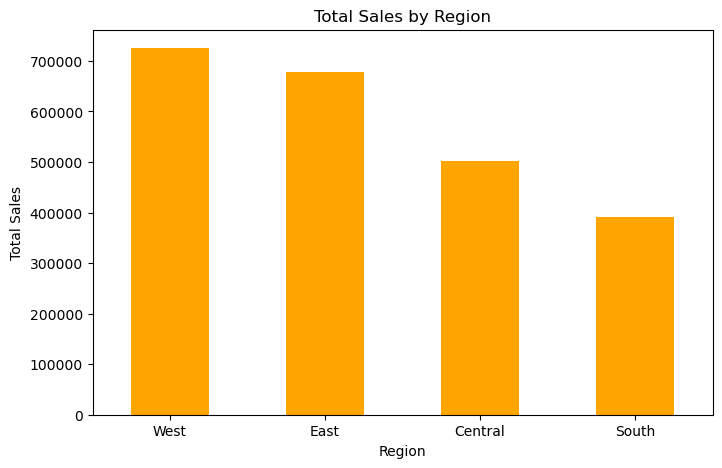

In [16]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


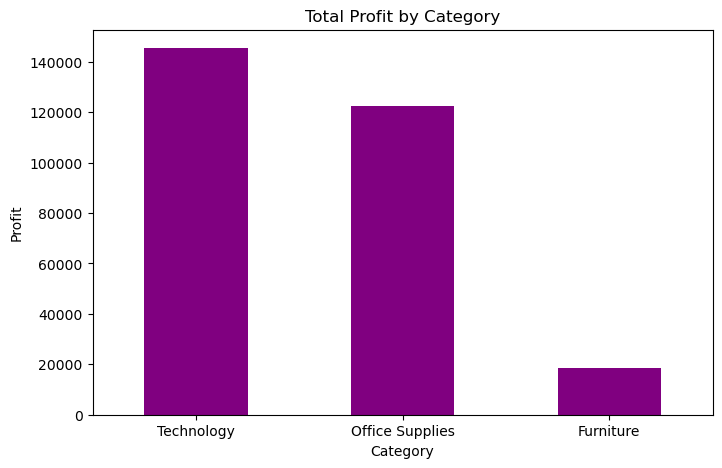

In [17]:
# Total profit by category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_profit.plot(kind='bar', color='purple')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.show()


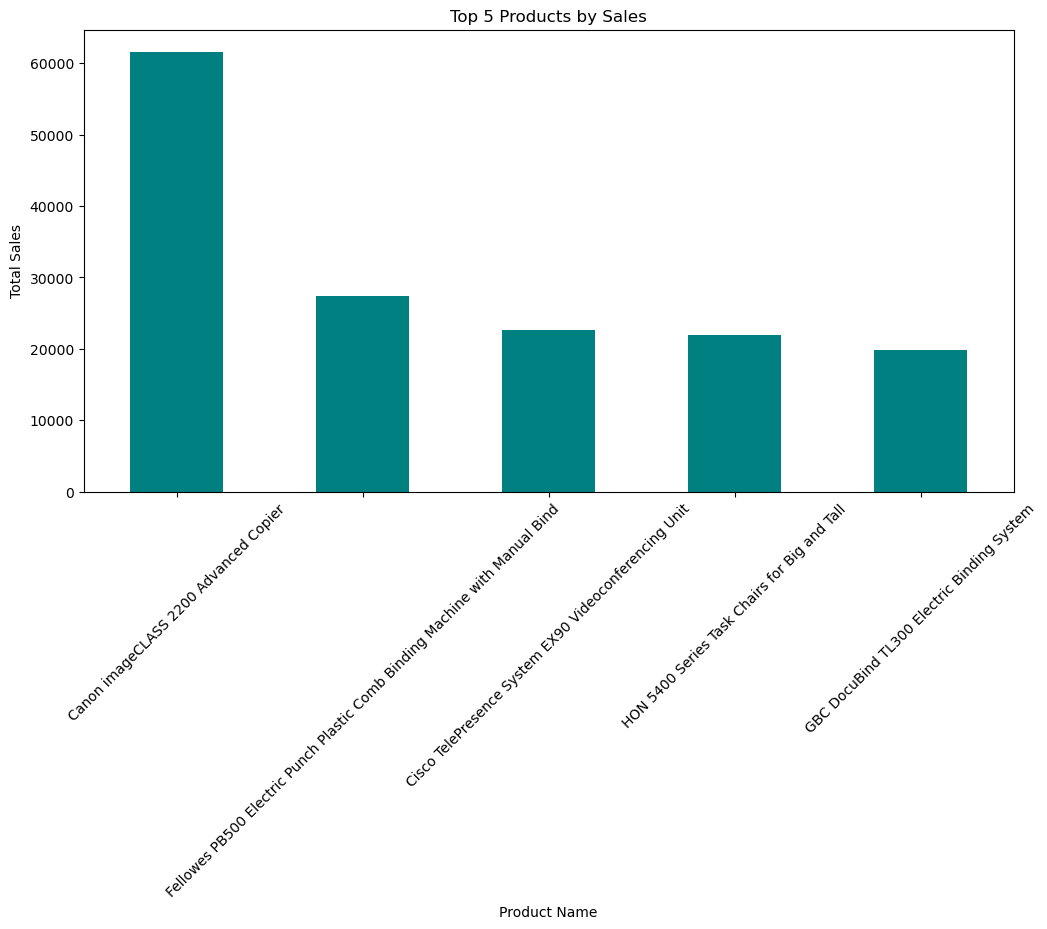

In [18]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='teal')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


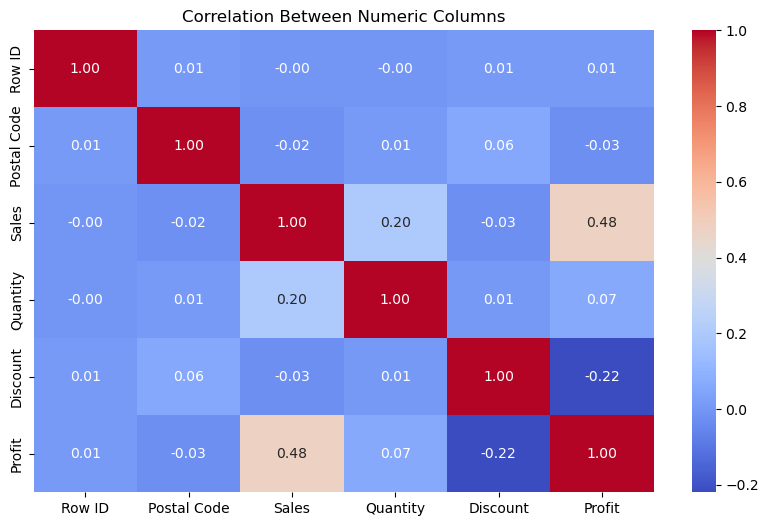

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Correlation Between Numeric Columns')
plt.show()

